Hotel Reservations Cancellation Prediction
The aim of this project to predict the possible reservations that are going to cancelled by the customers by analyzing various features and variables associated with the reservation.

Context
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Data Dictionary
| Column Name | Description | | --- | --- | |Booking_ID|unique identifier of each booking| |no_of_adults|number of adults| |no_of_children|number of children| |no_of_weekend_nights|number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel| |no_of_week_nights|number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel| |meal_type|meal type booked by the customer| |required_car_parking_spaces| Does the customer require a car parking space? (0 - No, 1- Yes)| |lead_time|Number of days between the date of booking and the arrival date| |arrival_year|Year of arrival| |arrival_month|Month of arrival| |arrival_date|Date of arrival| |market_segment|Market segment designation| |repeated_guest Is the customer a repeated guest? (0 - No, 1- Yes)| |no_previous_cancellations| Number of previous bookings that were canceled by the customer prior to the current booking| |previous_bookings_not_canceled|Number of previous bookings not canceled by the customer prior to the current booking| |avg_price_per_room|Average price per day of the reservation; prices of the rooms are dynamic. (in euros)| |no_of_special_requests|Total number of special requests made by the customer (e.g. high floor, view from the room, etc)| |booking_status|Flag indicating if the booking was canceled or not|

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


In [2]:
#loading the dataset
df=pd.read_csv('C:/Users/Omair Zia/Desktop/hotel reservation project/Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
# Data Preprocessing Part 1

In [4]:
df.shape

(36275, 19)

In [5]:
df.drop(['Booking_ID'], axis=1, inplace=True)

In [6]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [7]:
#Combining the year, month and day columns into a single column for date of arrival
#(yyyy/mm/dd)

In [8]:
df['date_of_arrival']= df['arrival_year'].astype(str)+'/' +  df['arrival_month'].astype(str)+'/' +  df['arrival_date'].astype(str)
df['date_of_arrival']=pd.to_datetime(df['date_of_arrival'],format='mixed',infer_datetime_format=True,errors='coerce',yearfirst=True)
df.drop(columns=['arrival_year','arrival_month','arrival_date'],inplace=True)

C:\Users\Omair Zia\AppData\Local\Temp\ipykernel_11616\1038924204.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_of_arrival']=pd.to_datetime(df['date_of_arrival'],format='mixed',infer_datetime_format=True,errors='coerce',yearfirst=True)


In [9]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled,2018-10-17
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled,2018-04-21


In [10]:
#checking the null values
df.isnull().sum()

no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
date_of_arrival                         37
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.reset_index()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
0,0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36233,36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36234,36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled,2018-10-17
36235,36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01
36236,36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled,2018-04-21


In [13]:
#checking datatype
df.dtypes

no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                               object
required_car_parking_space                       int64
room_type_reserved                              object
lead_time                                        int64
market_segment_type                             object
repeated_guest                                   int64
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no_of_special_requests                           int64
booking_status                                  object
date_of_arrival                         datetime64[ns]
dtype: object

In [14]:
# checking for the unique value in each column
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3919
no_of_special_requests                     6
booking_status                             2
date_of_arrival                          549
dtype: int64

In [15]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date_of_arrival
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238
mean,1.845301,0.105221,0.810475,2.204206,0.030934,85.275070,0.025553,0.023346,0.152961,103.437259,0.619957,2018-05-24 16:37:29.130746880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518572,0.402540,0.870992,1.410784,0.173142,85.953561,0.157801,0.368483,1.753366,35.084264,0.786403,NaN


In [16]:
#here the minimum room price and no of adult is zero which is not possible so 
# we use mean value of that hotel room which is zero and remove the zero having
#no of adult is zero

In [17]:
df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(),inplace=True)

C:\Users\Omair Zia\AppData\Local\Temp\ipykernel_11616\1171270613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(),inplace=True)


In [18]:
df.drop(df[df['no_of_adults']==0].index,inplace=True)

In [19]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11


In [20]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date_of_arrival
count,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099.000000,36099
mean,1.852406,0.097814,0.810022,2.203496,0.031026,85.224715,0.025652,0.023436,0.153550,105.071682,0.618715,2018-05-24 13:23:21.047120384
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,81.000000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,100.000000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.150000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.506745,0.384964,0.870868,1.410714,0.173390,85.974298,0.158096,0.369189,1.756713,32.648687,0.785732,NaN


In [21]:
#Exploratory data analysis

In [22]:
#In the exploratory data analysis, I will be visualizing the data to get a better
#understanding of the data and to see if there are any trends or patterns in the data. First
#I will begin with looking at the distribution of the data and then I will look at the
#relationship between the independent variables and the target variable.

In [23]:
#Guest Information

Text(0.5, 1.0, 'no_of_children')

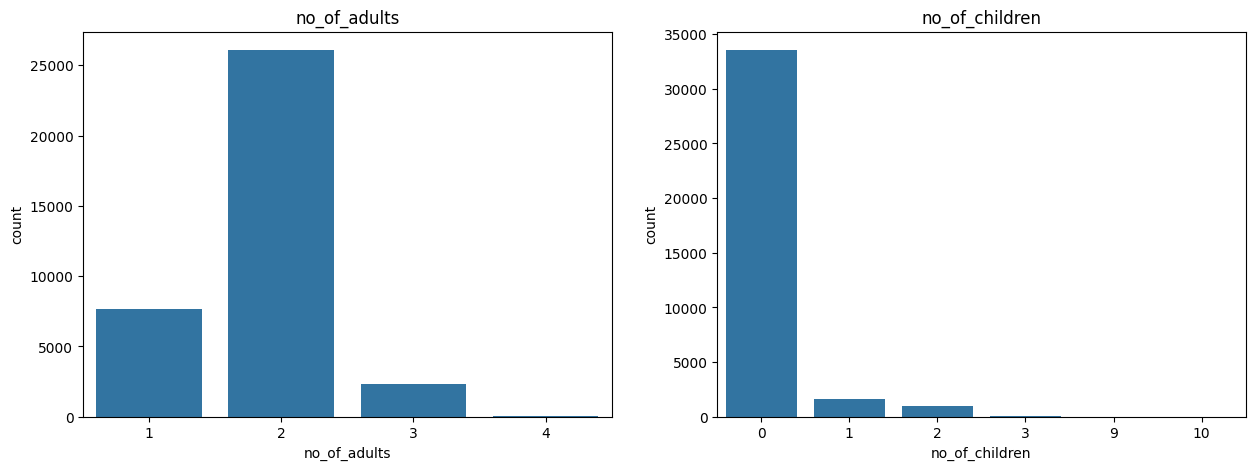

In [24]:
f,ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='no_of_adults',data=df,ax=ax[0]).set_title('no_of_adults')
sns.countplot(x='no_of_children',data=df,ax=ax[1]).set_title('no_of_children')

In [25]:
#Time spend in hotel

Text(0.5, 1.0, 'no_of_week_nights')

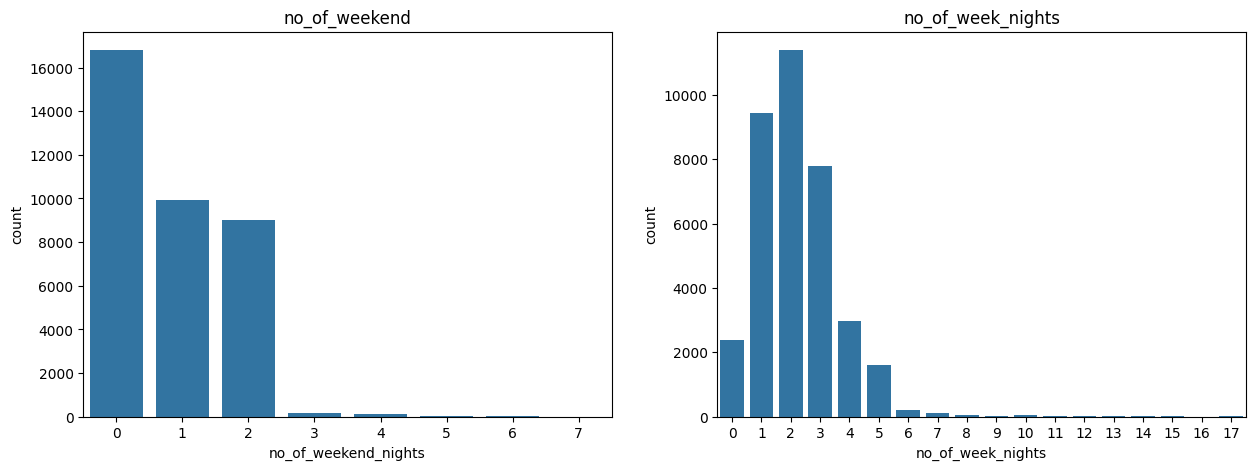

In [26]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='no_of_weekend_nights',data=df,ax=ax[0]).set_title('no_of_weekend')
sns.countplot(x='no_of_week_nights',data=df,ax=ax[1]).set_title('no_of_week_nights')

<Axes: xlabel='date_of_arrival', ylabel='count'>

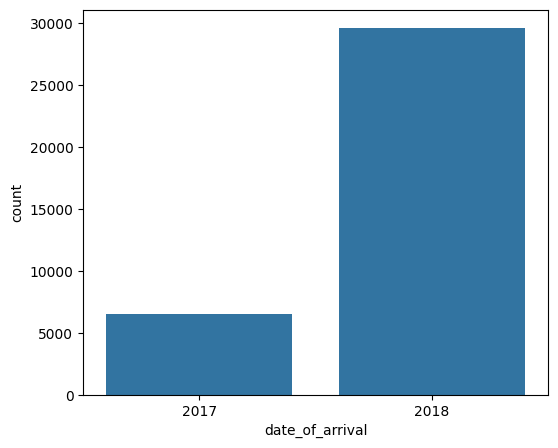

In [27]:
#no of bookings per year
f,ax=plt.subplots(1,1,figsize=(6,5))
sns.countplot(x=df['date_of_arrival'].dt.year)

Text(0.5, 1.0, 'Week of arrival')

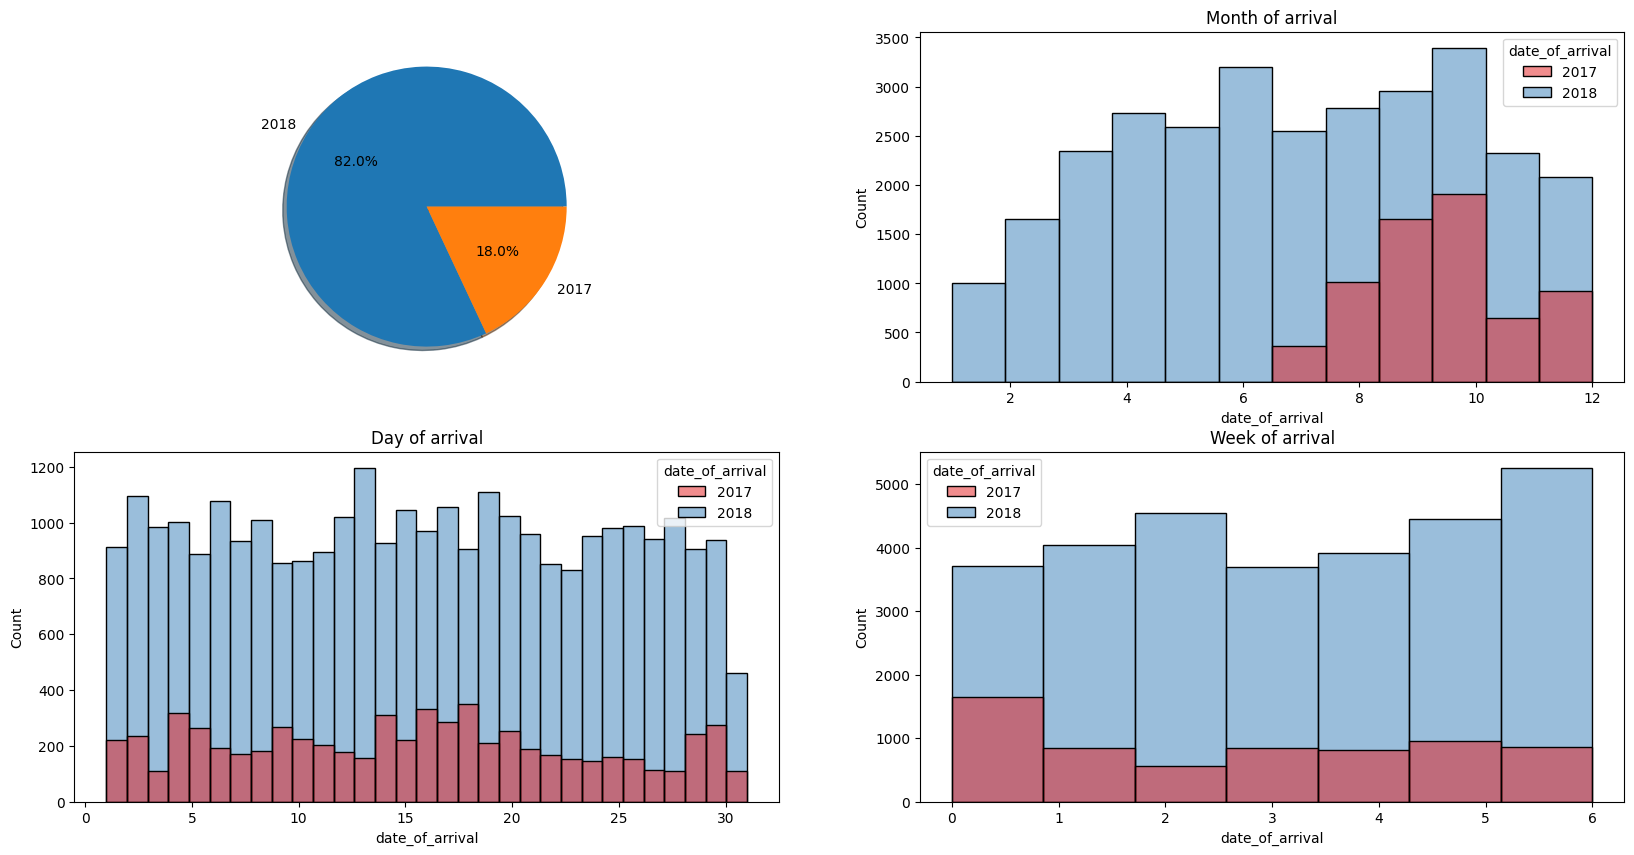

In [28]:
f,ax=plt.subplots(2,2,figsize=(20,10))
#year of arrival
ax[0,0].pie(df['date_of_arrival'].dt.year.value_counts(),labels=[2018,2017],autopct='%1.1f%%',shadow=True,startangle=0)
#month of arrival
sns.histplot(x = df['date_of_arrival'].dt.month, ax=ax[0,1], bins=12,hue=df['date_of_arrival'].dt.year, palette = 'Set1').set_title('Month of arrival')
#day of arrival
sns.histplot(x=df['date_of_arrival'].dt.day, ax=ax[1,0], bins=31,hue=df['date_of_arrival'].dt.year, palette='Set1').set_title('Day of arrival')
#day of week of arrival
sns.histplot(x=df['date_of_arrival'].dt.dayofweek,ax=ax[1,1],bins=7,hue=df['date_of_arrival'].dt.year, palette='Set1').set_title('Week of arrival')

These graphs shows the number of bookings for the specific date, day, month and year. In the dataset, majority of the bookings were in 2018, i.e. 82%. In both the years the month of October had most booings as compared to other months. In 2017 nearly 2000 bookings in october and in 2018 nearly 3500. In addtion to that June had highest number of bookings after October. Coming to the days of the month, In 2017, 4,14,16,18 days from the month had the most reservations. In 2018, 2,7,14,19 days of the month had the most reservations. In the days of the week, Sundays had the highest number of reservations in 2017, whereas the Saturdays had the highest number of reservations in 2018.

From the above visualizations, I can conclude that more bookings were made in June and October particulary on the second and third weeks and during the weekends.

#Services

Text(0.5, 1.0, 'Special Request')

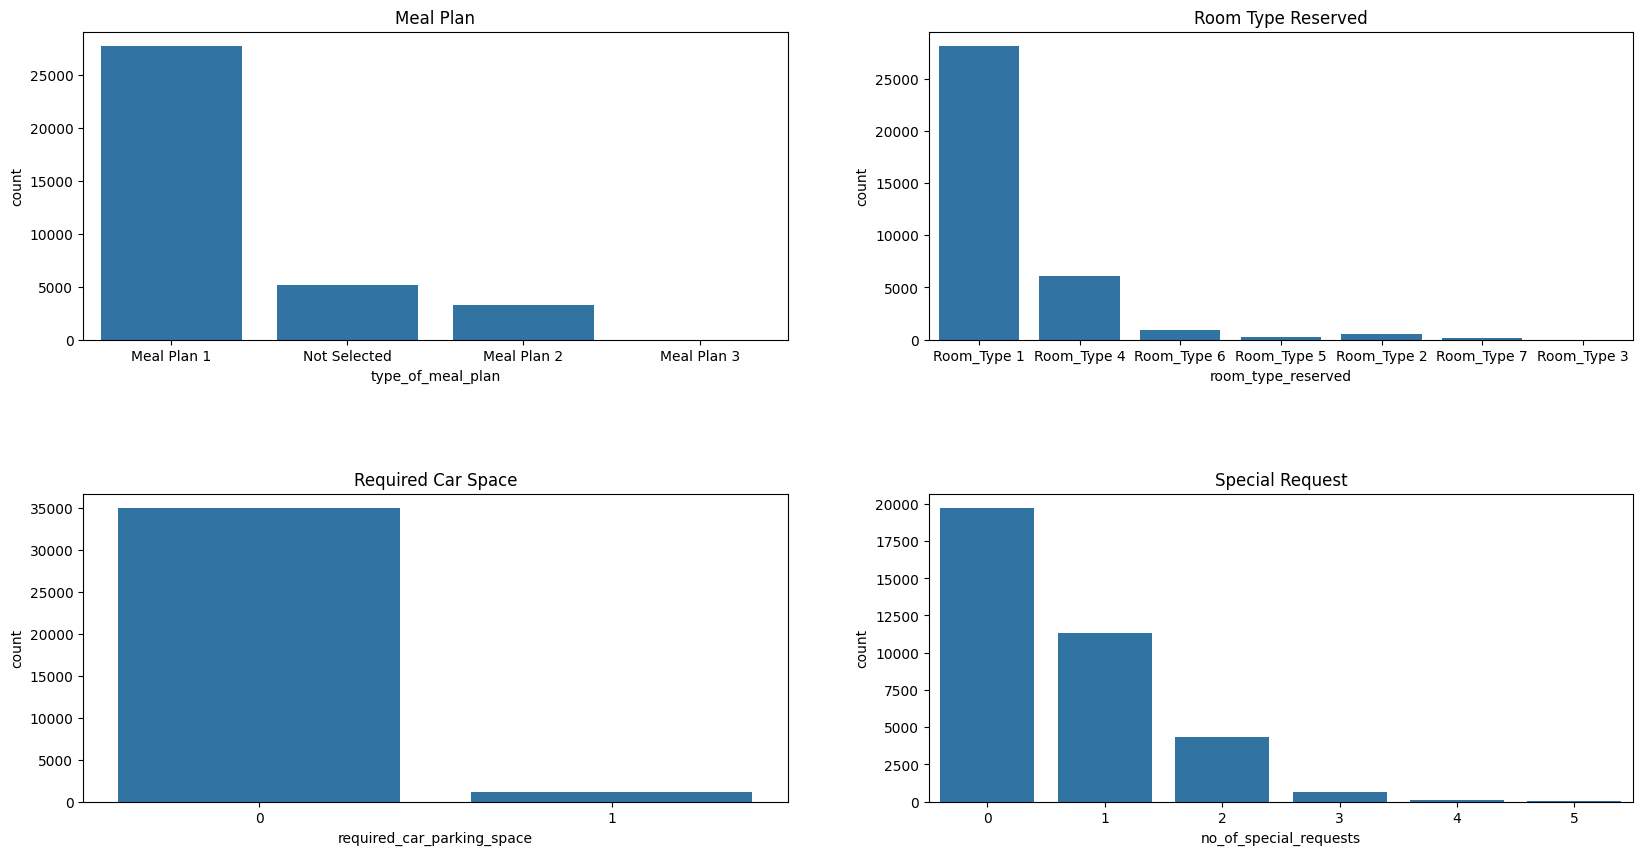

In [29]:
f,ax=plt.subplots(2,2,figsize=(20,10))
f.subplots_adjust(hspace=0.5)
sns.countplot(x = 'type_of_meal_plan', data = df, ax=ax[0,0]).set_title('Meal Plan')
sns.countplot(x='room_type_reserved',data=df,ax=ax[0,1]).set_title('Room Type Reserved')
sns.countplot(x='required_car_parking_space',data=df,ax=ax[1,0]).set_title('Required Car Space')
sns.countplot(x='no_of_special_requests',data=df,ax=ax[1,1]).set_title('Special Request')

The above graphs shows the type of services of the hotel taken by the guests during reservations. Majority of the guests preferred Meal Plan1 and Room Type 1 and no special requests during reservations and most of them don't require parking space. Moreover a significant number of reservations were made without specifiying the type of meal plan, which could mean that the guests might have meal outside the hotel. The required parking space graph also tells about the mode of transportation used by the guests. Most of the guests used public transport or taxi to reach the hotel.

#Lead time (days between date of reservation and date of arrival)

Text(0.5, 1.0, 'Lead Time')

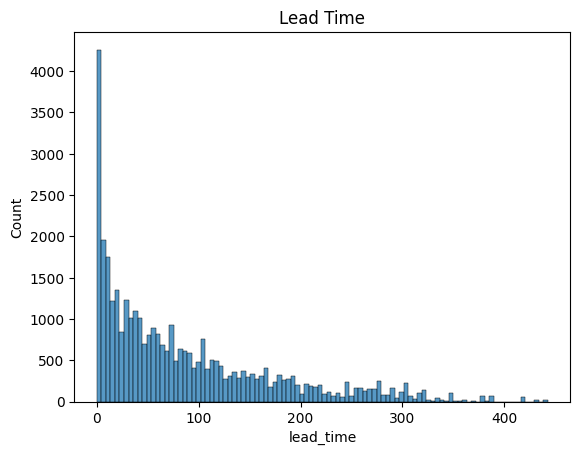

In [30]:
sns.histplot(x='lead_time',data=df,bins=100).set_title('Lead Time')

This graph shows that significant number of reservations were made just one day before or on the day of arrival. In addtion to that most of the reservations were made 1 to 2 weeks before the date of arrival. However, there were also reservations made 2-3 months before the date of arrival. From this histogram, I made ab hypothesis that, the guest who have lead time very less are less likely to cancel the reservation as compared to the guest who have more lead time.

C:\Users\Omair Zia\AppData\Local\Temp\ipykernel_11616\947831122.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='market_segment_type',data=df,palette='Set1').set_title('market segment')


Text(0.5, 1.0, 'market segment')

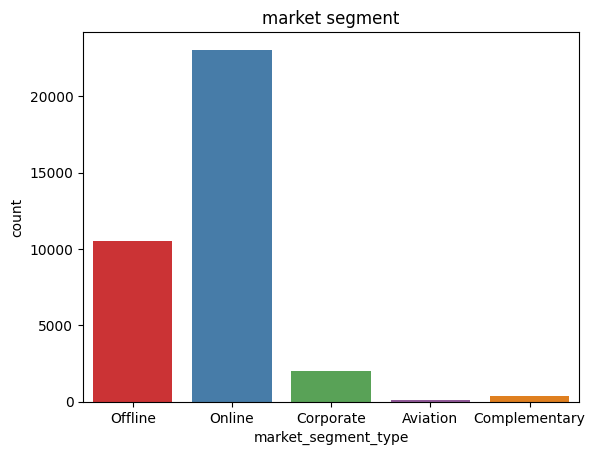

In [31]:
sns.countplot(x='market_segment_type',data=df,palette='Set1').set_title('market segment')

This graph shows the market segment of reservations and cancellation. Here most of the reservations are made through online platforms and thus it has the most number of cancellations. The second most common market segment is offline, which has the second most number of cancellations

<Axes: xlabel='booking_status', ylabel='count'>

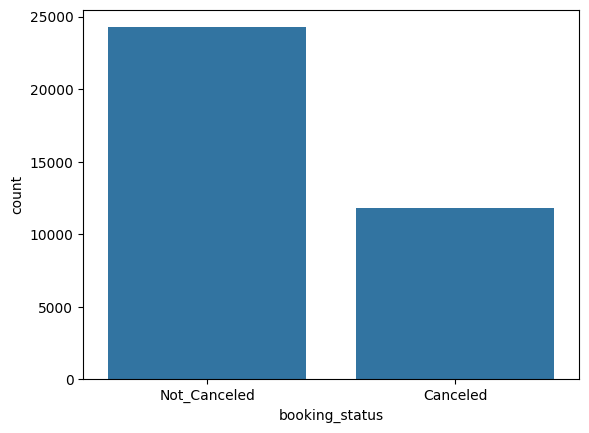

In [32]:
sns.countplot(x='booking_status',data=df)

In [33]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24265
Canceled        11834
Name: count, dtype: int64

In [34]:
#Guest's previous experience with the hotel

Text(0.5, 1.0, 'No of Previous Bookings not Canceled')

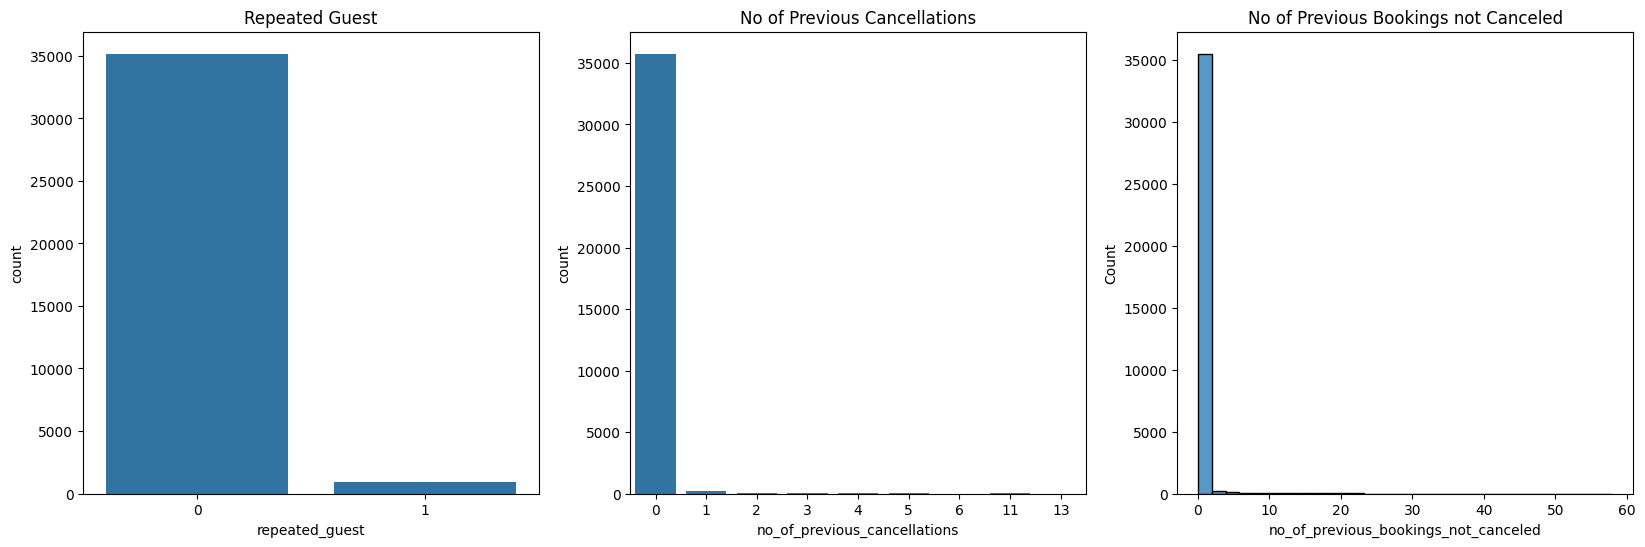

In [35]:
f,ax=plt.subplots(1,3,figsize=(20,6))
sns.countplot(x='repeated_guest',data=df,ax=ax[0]).set_title('Repeated Guest')
sns.countplot(x='no_of_previous_cancellations',data=df,ax=ax[1]).set_title('No of Previous Cancellations')
sns.histplot(x='no_of_previous_bookings_not_canceled',data=df,ax=ax[2],bins=30).set_title('No of Previous Bookings not Canceled')

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

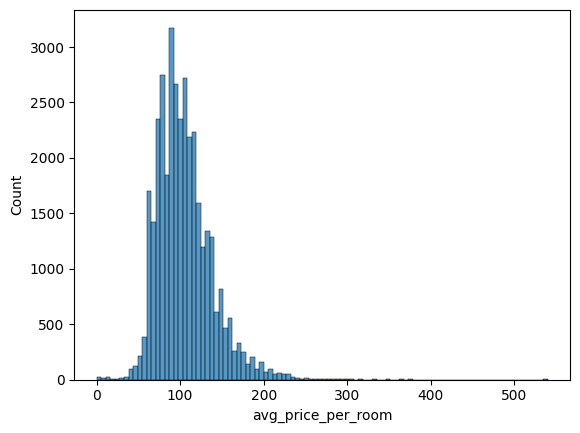

In [36]:
sns.histplot(x='avg_price_per_room',data=df,bins=100)

This graph shows the distribution of the room price. Majority of the reservations made had room price between 75 to 150. Very few of the reservations had room price more than 200.

Till now, I have plotted the distribution of data in all the variables and made some hypotheis around it. Now, I will look at the relationship between the independent variables and the target variable, to check the hypothesis.

In [37]:
#Guest Information and Cancellation

Text(0.5, 1.0, 'Number of Adults')

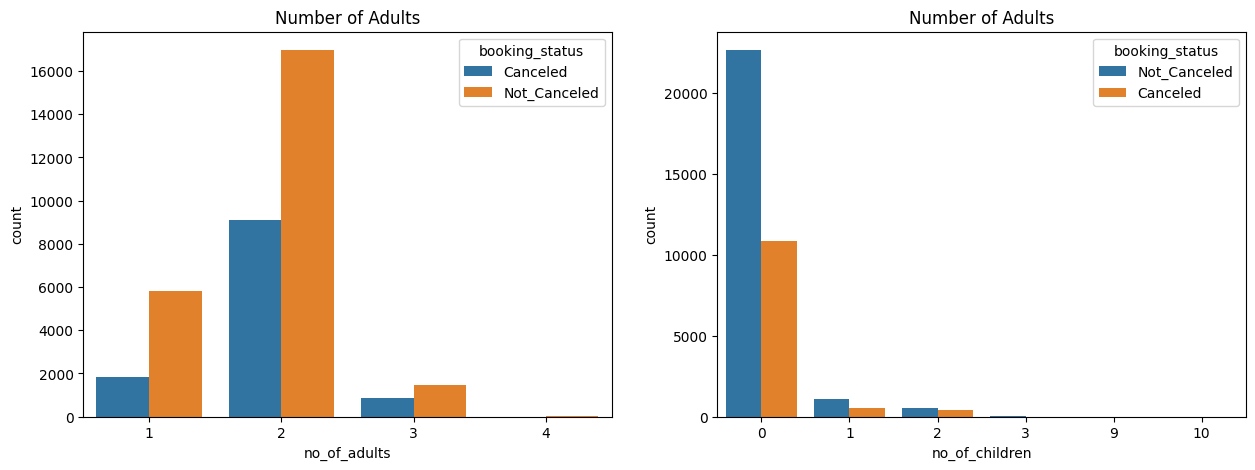

In [38]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='no_of_adults',data=df,ax=ax[0],hue='booking_status').set_title('Number of Adults')
sns.countplot(x='no_of_children',data=df,ax=ax[1],hue='booking_status').set_title('Number of Adults')

Majority of the reservation cancellations were made when the reservation was made for two adults, probably with no children. The second most common cancellation was made when the reservation was made for one adult. However, the number of cancellation reduces, when the reservation includes children and had more than 2 adults.

In [39]:
#Time Spent at Hotel and Cancellation

Text(0.5, 1.0, 'Number of Week Nights')

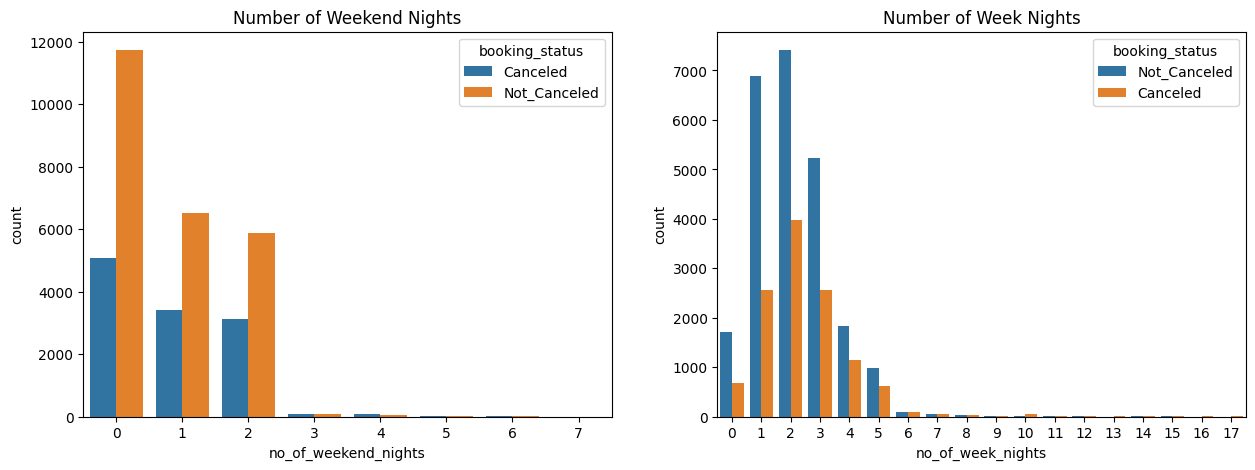

In [40]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='no_of_weekend_nights',data=df,ax=ax[0],hue='booking_status').set_title('Number of Weekend Nights')
sns.countplot(x='no_of_week_nights',data=df,ax=ax[1],hue='booking_status').set_title('Number of Week Nights')


#Date of Arrival and Cancellation

Text(0.5, 1.0, 'Cancellation by week in 2018')

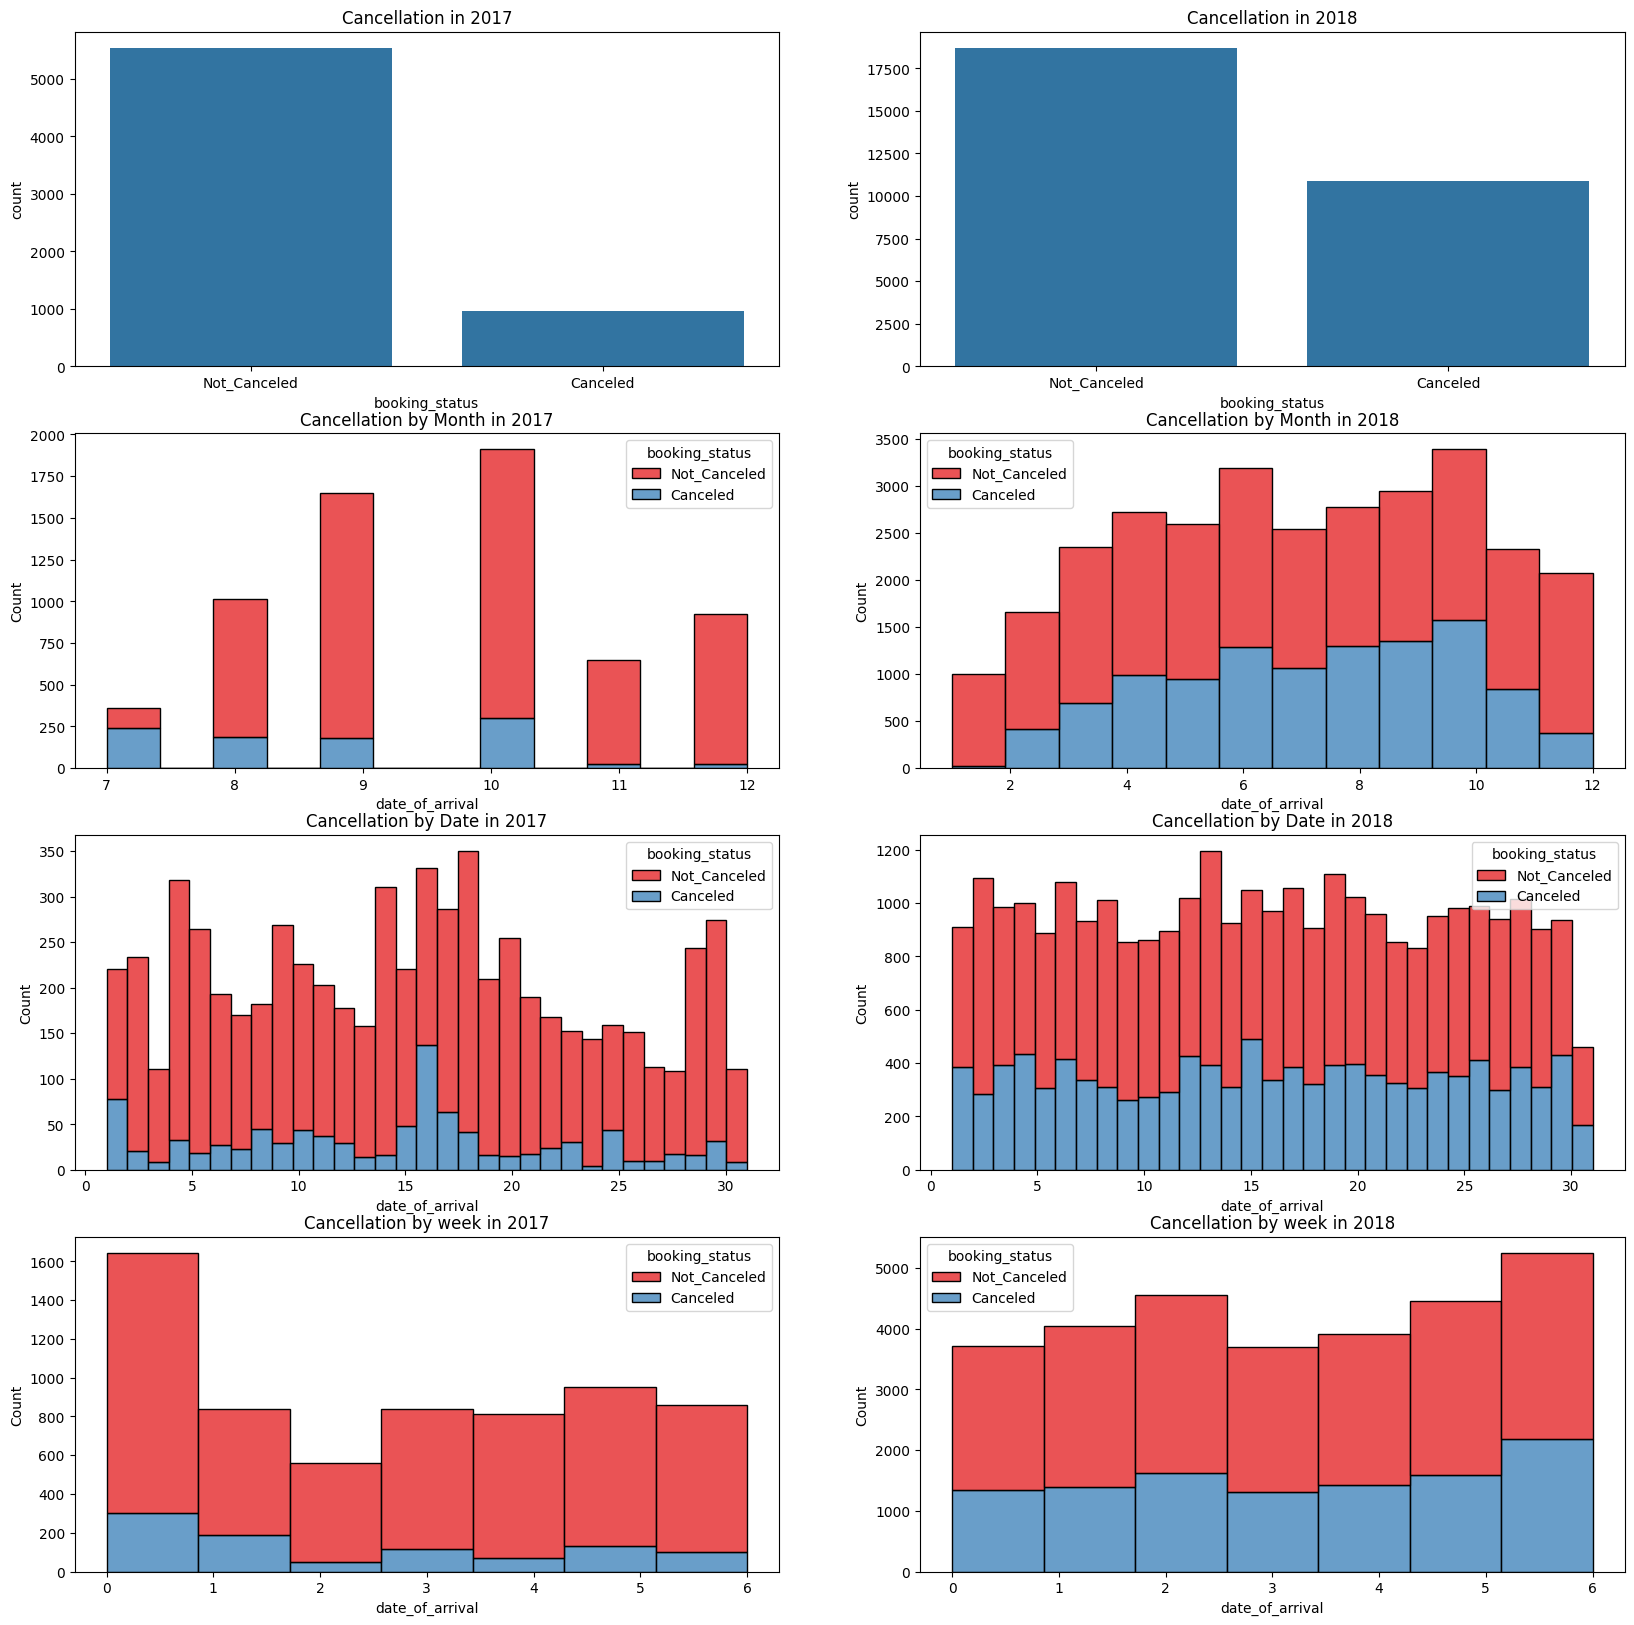

In [41]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
df_2017=df[df['date_of_arrival'].dt.year==2017]
df_2018=df[df['date_of_arrival'].dt.year==2018]
#year wise
sns.countplot(x=df_2017['booking_status'],data=df_2017,ax=ax[0,0]).set_title('Cancellation in 2017')
sns.countplot(x=df_2018['booking_status'],data=df_2017,ax=ax[0,1]).set_title('Cancellation in 2018')
#month wise
sns.histplot(x=df_2017['date_of_arrival'].dt.month,data=df_2017,ax=ax[1,0],bins=12 ,hue=df_2017['booking_status'],palette='Set1',multiple='stack').set_title('Cancellation by Month in 2017')
sns.histplot(x=df_2018['date_of_arrival'].dt.month,data=df_2018,ax=ax[1,1],bins=12,hue=df_2018['booking_status'],palette='Set1',multiple='stack').set_title('Cancellation by Month in 2018')
#date wise
sns.histplot(x=df_2017['date_of_arrival'].dt.day,data=df_2017,ax=ax[2,0],bins=31,hue=df_2017['booking_status'],palette='Set1',multiple='stack').set_title('Cancellation by Date in 2017')
sns.histplot(x=df_2018['date_of_arrival'].dt.day,data=df_2018,ax=ax[2,1],bins=31,hue=df_2018['booking_status'],palette='Set1',multiple='stack').set_title('Cancellation by Date in 2018')
#week wise
sns.histplot(x=df_2017['date_of_arrival'].dt.dayofweek,data=df_2017,ax=ax[3,0],bins=7,hue=df_2017['booking_status'],palette='Set1',multiple='stack').set_title('Cancellation by week in 2017')
sns.histplot(x=df_2018['date_of_arrival'].dt.dayofweek,data=df_2018,ax=ax[3,1],bins=7,hue=df_2018['booking_status'],palette='Set1',multiple='stack').set_title('Cancellation by week in 2018')

#The above graphs visualizes the reservation cancellation based on the dates the reservations were made. As we know that dataset mostly has reservations from 2018, despite of that, the number of reservations cancelled in 2018 is way higher than 2017. In 2017, nearly 5500 reservations were not cancelled and nearly 1000 where cancelled. However in 2018, 17500 reservations were not cancelled and more than 10000 reservations were cancelled. This shows that rate of reservation cancellation was much higher in 2018

Coming to the reservation cancellation according to the months, in 2017 reservations made in July and October had the highest. In addtion to that July had the least number of reservations made but still it has highest cancellation, which points some particular reason, not specified by the data. In 2018, June and October had the highest number of reservations made.

Now, we will look at the reservation cancellations by date of the month. In 2017, most reservations were cancelled for 16th and peculiarly on 1st of the month. In 2018, the number of cancellations were more in second and first week.

Coming to the day wise cancellation, in 2017 Sundays had the highest number of cancellations. In 2018, Saturdays had the highest number of cancellations.

In [42]:
#Services and Cancellation

Text(0.5, 1.0, 'effect  of special request')

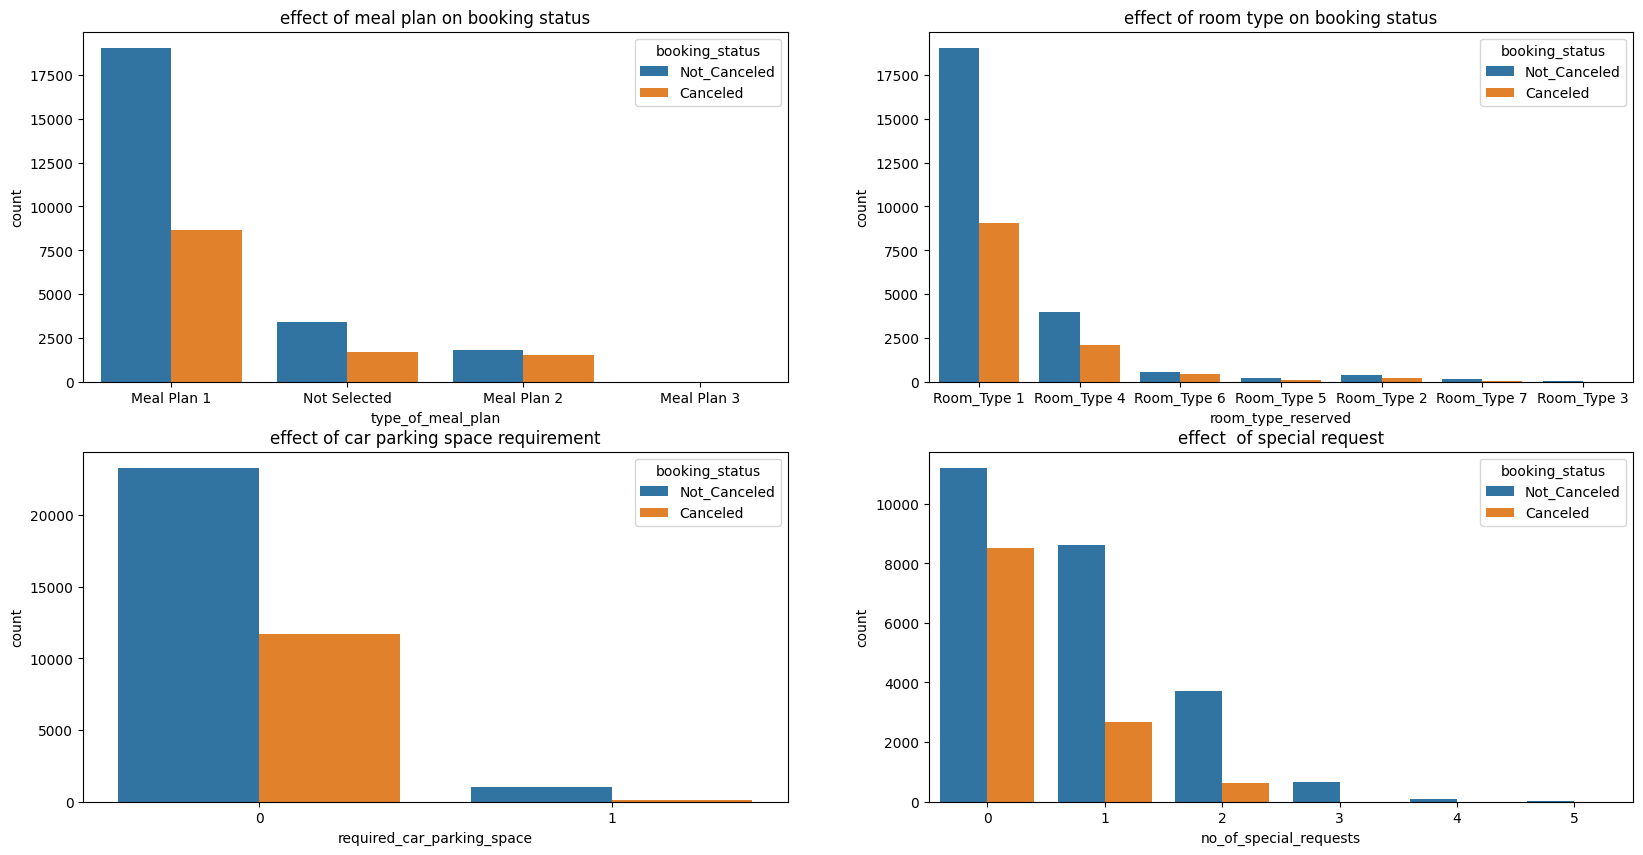

In [43]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
sns.countplot(x='type_of_meal_plan',data=df,ax=ax[0,0],hue='booking_status').set_title('effect of meal plan on booking status')
sns.countplot(x='room_type_reserved',data=df,ax=ax[0,1],hue='booking_status').set_title('effect of room type on booking status')
sns.countplot(x='required_car_parking_space',data=df,ax=ax[1,0],hue='booking_status').set_title('effect of car parking space requirement')
sns.countplot(x='no_of_special_requests',data=df,ax=ax[1,1],hue='booking_status').set_title('effect  of special request')

In the above graphs, we can see that the ratio of cancelled and not cancelled reservations is almost same for all the services. Therefore, I can conclude that the services provided by the hotel does not have any impact on the reservation cancellation.
but when number of special request increase cancellation ratio is less means customer more likely to stay when special request is being made

In [44]:
#Lead time and Cancellation

Text(0.5, 1.0, 'effect of lead time on booking status')

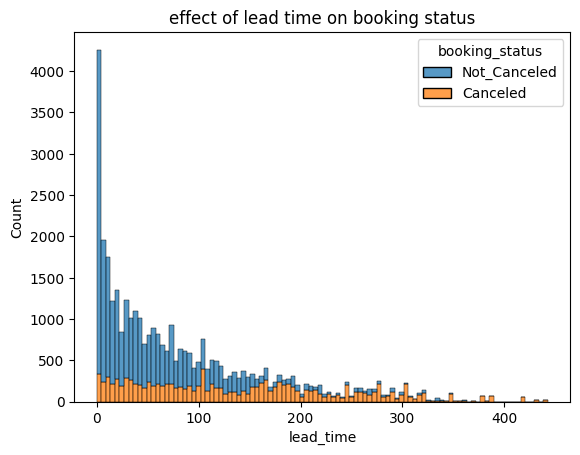

In [45]:
sns.histplot(x='lead_time',data=df,bins=100,hue='booking_status',multiple='stack').set_title('effect of lead time on booking status')

My hypothesis was true. With increase in lead time, the number of reservation cancellations also increases. The differnce in the number of reservations cancelled and not cancelled decreases as the lead time increases. This could mean that the guest who have lead time very less are less likely to cancel the reservation as compared to the guest who have more lead time.

In [46]:
#Market segment and cancellation 

Text(0.5, 1.0, 'effect of market segment')

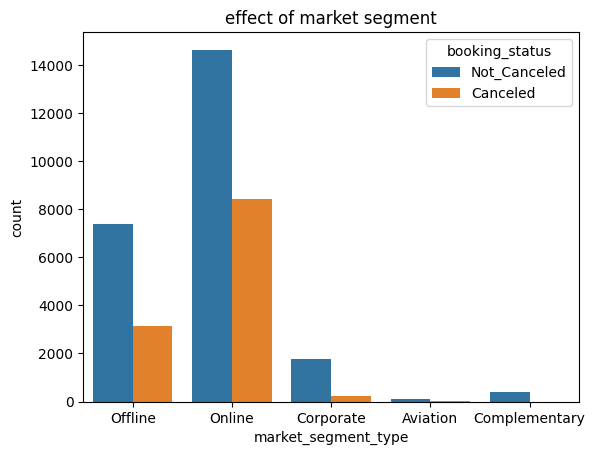

In [47]:
sns.countplot(x='market_segment_type',data=df,hue='booking_status').set_title('effect of market segment')

This graph shows the market segment of reservations and cancellation. Here most of the reservations are made through online platforms and thus it has the most number of cancellations. The second most common market segment is offline, which has the second most number of cancellations.

In [48]:
#Guest's previous experience and Cancellation

Text(0.5, 1.0, 'effect of repeated guest on booking status')

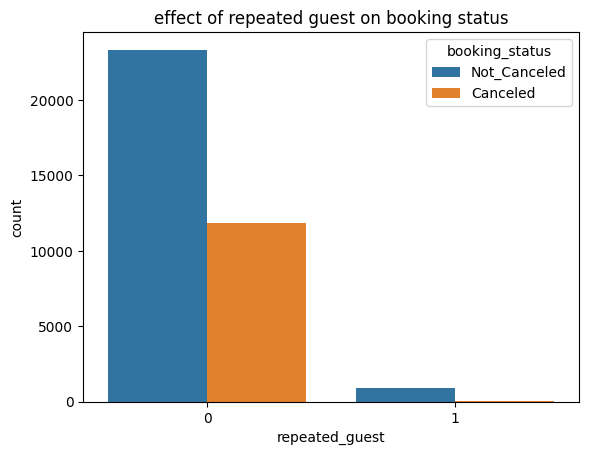

In [49]:
sns.countplot(x='repeated_guest',data=df,hue='booking_status').set_title('effect of repeated guest on booking status')

The previous guest are much less likely to cancel the reservation as compared to the new guest

In [50]:
#Average room price and Cancellation

Text(0.5, 1.0, 'effect of avg price per room')

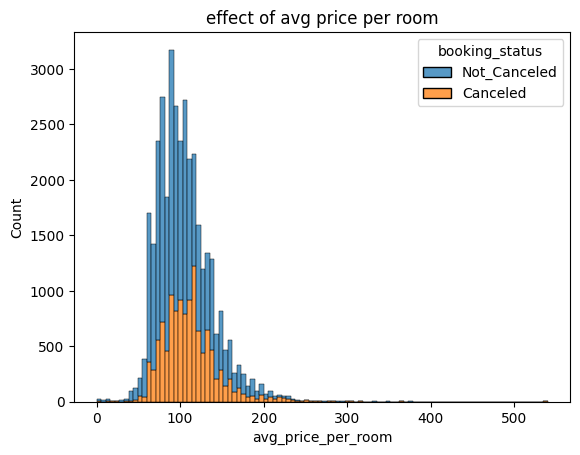

In [51]:
sns.histplot(x='avg_price_per_room',data=df,bins=100,hue='booking_status',multiple='stack').set_title('effect of avg price per room')

Most of the room prices are between 75-150 and the number of reservations cancellation mostly occur in the same range. Therefore, there is no relation between the room price and reservation cancellation.

In [52]:
#Data Preprocessing Part 2

In [53]:
#Outlier Removal using IQR

In [54]:
#columns for outlier removal

cols=['lead_time','avg_price_per_room']
Q1=df[cols].quantile(0.25)
Q3=df[cols].quantile(0.75)
IQR=Q3-Q1
#removing outlier
df=df[~((df[cols]<(Q1-1.5*IQR)) | (df[cols]>(Q3+1.5*IQR))).any(axis=1)]

In [55]:
#Label Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder
#label encoding object
le=LabelEncoder()
#columns to be encoded
cols=['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']
#label encoding
for col in cols:
    le.fit(df[col])
    df[col]=le.transform(df[col])
    print(col,df[col].unique())

type_of_meal_plan [0 3 1 2]
room_type_reserved [0 3 5 4 1 6 2]
market_segment_type [3 4 2 0 1]
booking_status [1 0]


C:\Users\Omair Zia\AppData\Local\Temp\ipykernel_11616\4013704727.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.transform(df[col])
C:\Users\Omair Zia\AppData\Local\Temp\ipykernel_11616\4013704727.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.transform(df[col])
C:\Users\Omair Zia\AppData\Local\Temp\ipykernel_11616\4013704727.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [57]:
# Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
#standardscaler object
scaler=StandardScaler()
df[['lead_time','avg_price_per_room']]=scaler.fit_transform(df[['lead_time','avg_price_per_room']])

C:\Users\Omair Zia\AppData\Local\Temp\ipykernel_11616\4250637801.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['lead_time','avg_price_per_room']]=scaler.fit_transform(df[['lead_time','avg_price_per_room']])


In [59]:
#Correlation Matrix Heatmap

<Axes: >

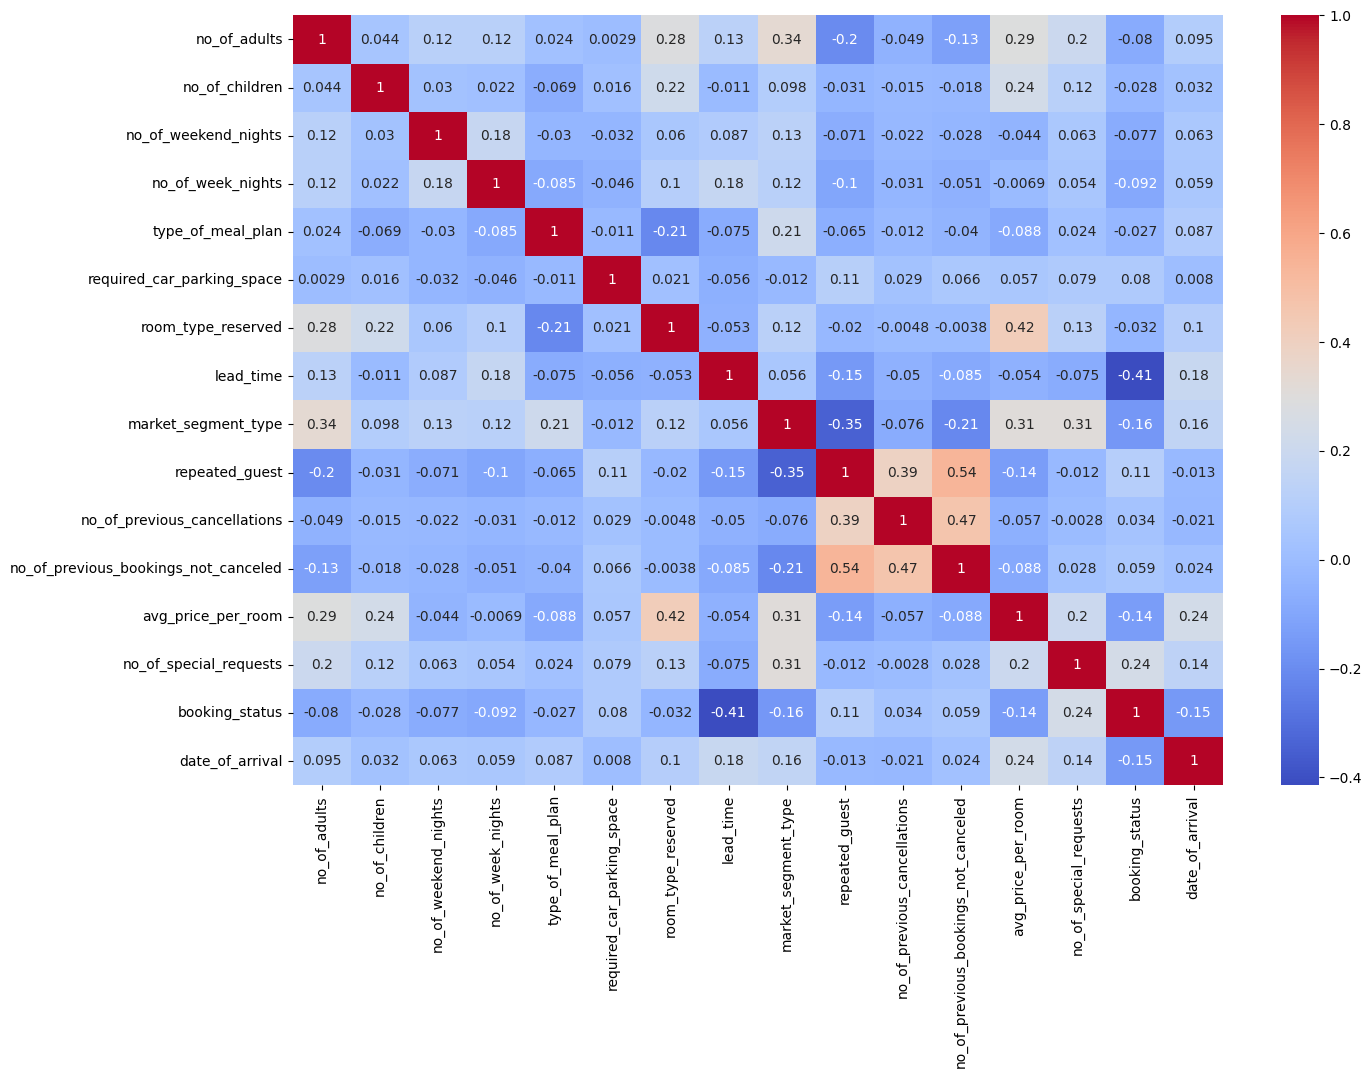

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('booking_status', axis=1), df['booking_status'], test_size=0.2, random_state=42)

In [62]:
# Model Building

i will be using the following models

In [63]:
#Decision Tree Classifier
#Random Forest Classifier
#Logistic Regression
#Support Vector Classifier

we need to convert column in X_train  date_of_arrival column into datetime column we need to extract its numeric value because ML model dont know
in date_of_arrival column which is year month day first we need to convert into datetime column then we need to make separate column
of arrival_year , arrival_month and arrival_day and then drop the original column of date_of_arrival similarly we have to do same process with X_test

In [64]:
X_train['date_of_arrival'] = pd.to_datetime(X_train['date_of_arrival'])

# Extract parts
X_train['arrival_year'] = X_train['date_of_arrival'].dt.year
X_train['arrival_month'] = X_train['date_of_arrival'].dt.month
X_train['arrival_day'] = X_train['date_of_arrival'].dt.day

In [65]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date_of_arrival,arrival_year,arrival_month,arrival_day
28923,2,0,0,2,0,0,0,-0.945884,4,0,0,0,0.792984,2,2017-09-04,2017,9,4
7155,2,0,1,3,0,0,3,-0.259622,4,0,0,0,1.097692,1,2018-10-10,2018,10,10
25902,2,0,2,2,0,0,3,-0.534127,3,0,0,0,-1.281233,0,2017-10-30,2017,10,30
32392,2,0,0,1,0,0,0,-1.041960,4,0,0,0,2.114608,2,2018-07-23,2018,7,23
31767,2,0,1,0,0,0,0,-0.712555,3,0,0,0,-1.189453,0,2017-12-14,2017,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18204,1,0,0,0,0,0,0,0.083509,1,0,0,0,0.038089,1,2017-12-17,2017,12,17
6768,2,0,0,4,0,0,0,-1.041960,4,0,0,0,-0.345082,2,2018-02-10,2018,2,10
12208,2,0,1,3,3,0,0,-0.245897,4,0,0,0,0.007351,0,2018-06-27,2018,6,27
922,1,0,1,1,0,0,0,-0.877258,2,0,0,0,-0.859047,0,2018-07-11,2018,7,11


In [66]:
X_train = X_train.drop(columns=['date_of_arrival'])


In [67]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,arrival_year,arrival_month,arrival_day
28923,2,0,0,2,0,0,0,-0.945884,4,0,0,0,0.792984,2,2017,9,4
7155,2,0,1,3,0,0,3,-0.259622,4,0,0,0,1.097692,1,2018,10,10
25902,2,0,2,2,0,0,3,-0.534127,3,0,0,0,-1.281233,0,2017,10,30
32392,2,0,0,1,0,0,0,-1.041960,4,0,0,0,2.114608,2,2018,7,23
31767,2,0,1,0,0,0,0,-0.712555,3,0,0,0,-1.189453,0,2017,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18204,1,0,0,0,0,0,0,0.083509,1,0,0,0,0.038089,1,2017,12,17
6768,2,0,0,4,0,0,0,-1.041960,4,0,0,0,-0.345082,2,2018,2,10
12208,2,0,1,3,3,0,0,-0.245897,4,0,0,0,0.007351,0,2018,6,27
922,1,0,1,1,0,0,0,-0.877258,2,0,0,0,-0.859047,0,2018,7,11


In [68]:
X_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date_of_arrival
20217,2,0,0,4,0,0,0,0.563892,4,0,0,0,-1.596954,1,2017-08-26
16142,2,0,0,2,0,0,3,-0.177271,4,0,0,0,1.395057,0,2018-05-27
4752,2,0,3,6,0,0,0,0.440365,4,0,0,0,-1.106852,0,2018-07-18
26105,2,0,1,2,0,0,0,1.661910,3,0,0,0,-0.455217,0,2018-09-09
12486,1,0,2,2,0,0,0,1.167802,3,0,0,0,0.462577,0,2018-10-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27295,2,0,0,2,3,0,0,-1.041960,4,0,0,0,0.646136,1,2018-12-29
12951,2,0,2,2,0,0,0,0.412914,4,0,0,0,-1.717002,0,2017-12-18
35757,2,0,2,1,0,0,0,-0.534127,3,0,0,0,-0.638776,0,2018-03-12
6033,2,0,2,1,0,0,0,2.718753,4,0,0,0,0.139514,0,2018-10-01


In [69]:
# On X_test, do the same steps as X_train
X_test['date_of_arrival'] = pd.to_datetime(X_test['date_of_arrival'])

X_test['arrival_year'] = X_test['date_of_arrival'].dt.year
X_test['arrival_month'] = X_test['date_of_arrival'].dt.month
X_test['arrival_day'] = X_test['date_of_arrival'].dt.day



In [70]:
X_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date_of_arrival,arrival_year,arrival_month,arrival_day
20217,2,0,0,4,0,0,0,0.563892,4,0,0,0,-1.596954,1,2017-08-26,2017,8,26
16142,2,0,0,2,0,0,3,-0.177271,4,0,0,0,1.395057,0,2018-05-27,2018,5,27
4752,2,0,3,6,0,0,0,0.440365,4,0,0,0,-1.106852,0,2018-07-18,2018,7,18
26105,2,0,1,2,0,0,0,1.661910,3,0,0,0,-0.455217,0,2018-09-09,2018,9,9
12486,1,0,2,2,0,0,0,1.167802,3,0,0,0,0.462577,0,2018-10-14,2018,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27295,2,0,0,2,3,0,0,-1.041960,4,0,0,0,0.646136,1,2018-12-29,2018,12,29
12951,2,0,2,2,0,0,0,0.412914,4,0,0,0,-1.717002,0,2017-12-18,2017,12,18
35757,2,0,2,1,0,0,0,-0.534127,3,0,0,0,-0.638776,0,2018-03-12,2018,3,12
6033,2,0,2,1,0,0,0,2.718753,4,0,0,0,0.139514,0,2018-10-01,2018,10,1


In [71]:
X_test = X_test.drop(columns=['date_of_arrival'])

In [72]:
X_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,arrival_year,arrival_month,arrival_day
20217,2,0,0,4,0,0,0,0.563892,4,0,0,0,-1.596954,1,2017,8,26
16142,2,0,0,2,0,0,3,-0.177271,4,0,0,0,1.395057,0,2018,5,27
4752,2,0,3,6,0,0,0,0.440365,4,0,0,0,-1.106852,0,2018,7,18
26105,2,0,1,2,0,0,0,1.661910,3,0,0,0,-0.455217,0,2018,9,9
12486,1,0,2,2,0,0,0,1.167802,3,0,0,0,0.462577,0,2018,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27295,2,0,0,2,3,0,0,-1.041960,4,0,0,0,0.646136,1,2018,12,29
12951,2,0,2,2,0,0,0,0.412914,4,0,0,0,-1.717002,0,2017,12,18
35757,2,0,2,1,0,0,0,-0.534127,3,0,0,0,-0.638776,0,2018,3,12
6033,2,0,2,1,0,0,0,2.718753,4,0,0,0,0.139514,0,2018,10,1


In [73]:
# Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
#decision tree classifier Object
dtree=DecisionTreeClassifier()

In [75]:
#Hyperparameter Tuning using GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV
#grid search parameters
grid_param={
    'max_depth':[2,4,6,8],
    'min_samples_leaf':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'criterion':['gini','entropy'],
    'random_state':[0,42]
}
#grid search object
grid_search=GridSearchCV(estimator=dtree,param_grid=grid_param,cv=5,n_jobs=-1,scoring='accuracy')
#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)
#best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [77]:
#decision tree classifier object with best parameters
dtree = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

#Training the model
dtree.fit(X_train, y_train)

#Training accuracy
print(dtree.score(X_train, y_train))

#Predicting the test set results
d_pred = dtree.predict(X_test)

0.8663940520446096


In [78]:
#Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
#random forest classifier object
rfc=RandomForestClassifier()

Hyperparameter Tuning using GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV
#grid search parameters
grid_param={
    'max_depth':[2,4,6,8],
    'min_samples_leaf':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'criterion':['gini','entropy'],
    'random_state':[0,42]
}    
#grid search object
grid_search=GridSearchCV(estimator=rfc,param_grid=grid_param,cv=5,n_jobs=-1)
#fitting the grid search object to the training data
grid_search.fit(X_train,y_train)
#best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


In [81]:
#random forest classifier object with best parameters
rfc=RandomForestClassifier(criterion='gini',max_depth=8,min_samples_leaf=2,min_samples_split=8,random_state=0)
#Training the model
rfc.fit(X_train,y_train)
#Training accuracy
print(rfc.score(X_train,y_train))
#Predicting the test set results
r_pred=rfc.predict(X_test)

0.8672118959107806


#Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
#logistic regression object
logreg=LogisticRegression()


Hyperparameter Tuning using GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV
#grid search parameters
grid_param={
    'penalty':['l1','l2','elasticnet','none'],
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'random_state':[0,42]
}
#grid search object
grid_search= GridSearchCV(estimator=logreg,param_grid=grid_param,cv=5,n_jobs=-1)

#fitting the grid search object to the training data
grid_search.fit(X_train,y_train) 

#best parameters
print(grid_search.best_params_)
                          

C:\Users\Omair Zia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
910 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Omair Zia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Omair Zia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

{'C': 1, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}


In [84]:
#logistic regression object with best parameters
logreg=LogisticRegression(C=1,penalty='l2',random_state=0,solver='liblinear')
logreg.fit(X_train,y_train)
#Training accuracy
print(logreg.score(X_train,y_train))

#Predicting the test set result


0.7986988847583643


In [85]:
#logistic regression object with best parameters
logreg=LogisticRegression(C=1,penalty='l2',random_state=0,solver='liblinear')
logreg.fit(X_train,y_train)
#Training accuracy
print(logreg.score(X_train,y_train))

#Predicting the test set result
l_pred=logreg.predict(X_test)

0.7986988847583643


In [86]:
#Model Evaluation

In [87]:
# Confusion Matrix Heatmap

Text(0.5, 1.0, 'Logistic Regression')

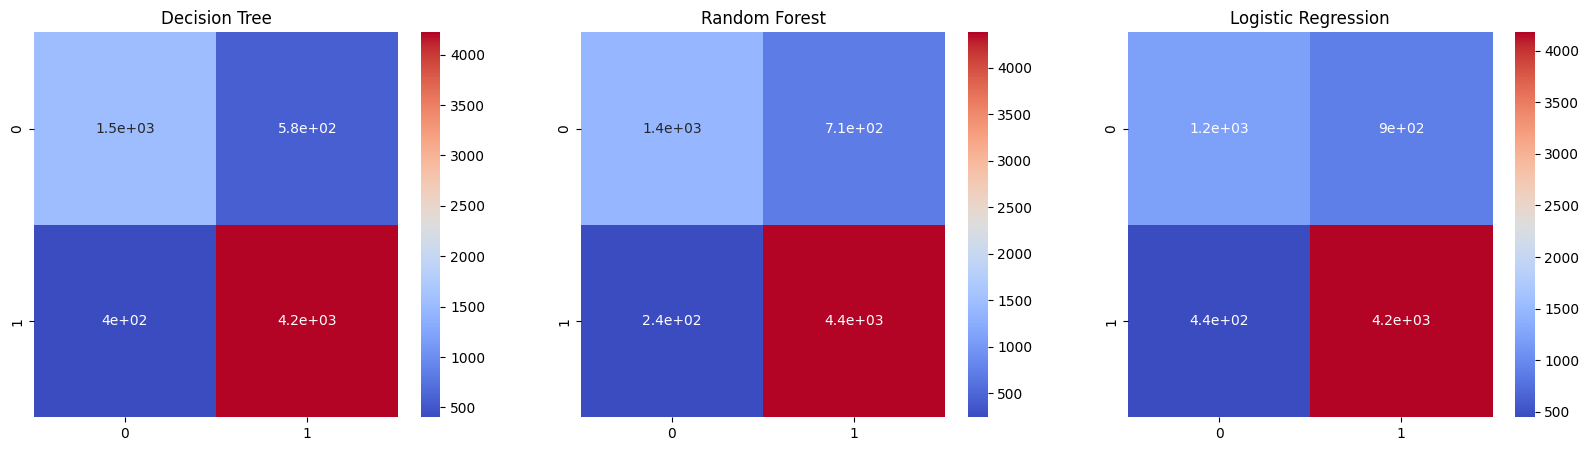

In [88]:
from sklearn.metrics import confusion_matrix
fig,ax=plt.subplots(1,3,figsize=(20,5))
#decision tree
sns.heatmap(confusion_matrix(y_test,d_pred),annot=True,cmap='coolwarm',ax=ax[0]).set_title('Decision Tree')
sns.heatmap(confusion_matrix(y_test,r_pred),annot=True,cmap='coolwarm',ax=ax[1]).set_title('Random Forest')
sns.heatmap(confusion_matrix(y_test,l_pred),annot=True,cmap='coolwarm',ax=ax[2]).set_title('Logistic Regression')

So the four cells represent:

Top-left (TN): True Negatives = correctly predicted not canceled

Top-right (FP): False Positives = wrongly predicted canceled

Bottom-left (FN): False Negatives = wrongly predicted not canceled

Bottom-right (TP): True Positives = correctly predicted canceled

Best Performer: Random Forest / Decision Tree
Higher True Positives (TP)

Lower False Negatives (FN)

Better at catching cancellations

Logistic Regression weaker
More false negatives (missed cancellations)

Higher false positives (wrongly flagged non-cancellations)



In [89]:
# Distribusion Plot

C:\Users\Omair Zia\AppData\Local\Temp\ipykernel_11616\175214746.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,ax=ax[0],hist=False).set_title('Decision Tree')
C:\Users\Omair Zia\AppData\Local\Temp\ipykernel_11616\175214746.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

<Axes: title={'center': 'logistic Regression'}, xlabel='booking_status', ylabel='Density'>

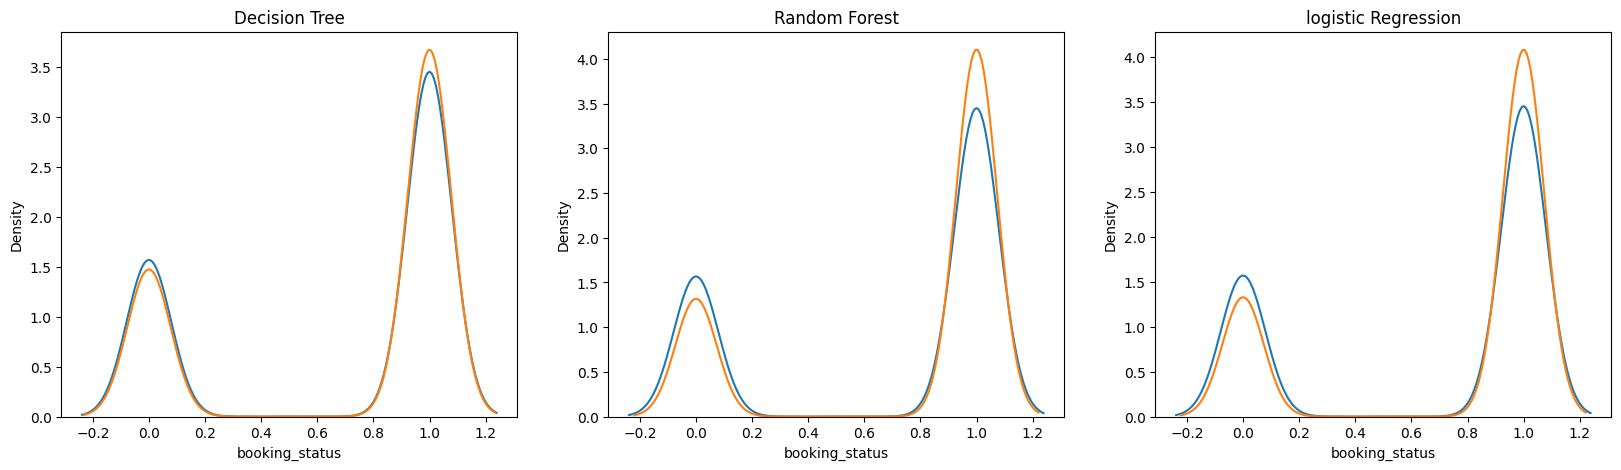

In [90]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
#decision tree
sns.distplot(y_test,ax=ax[0],hist=False).set_title('Decision Tree')
sns.distplot(d_pred,ax=ax[0],hist=False)
#random forest
sns.distplot(y_test,ax=ax[1],hist=False).set_title('Random Forest')
sns.distplot(r_pred,ax=ax[1],hist=False)
#logistic Regression
sns.distplot(y_test,ax=ax[2],hist=False).set_title('logistic Regression')
sns.distplot(l_pred,ax=ax[2],hist=False)

In [91]:
#Classification Report

In [92]:
from sklearn.metrics import classification_report

In [93]:
#decision tree
print('Decision Tree')
print(classification_report(y_test, d_pred))
#random forest
print('Random Forest')
print(classification_report(y_test,r_pred))
#logistic Regression
print(classification_report(y_test,l_pred))
      

Decision Tree
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      2101
           1       0.88      0.91      0.90      4624

    accuracy                           0.85      6725
   macro avg       0.84      0.82      0.83      6725
weighted avg       0.85      0.85      0.85      6725

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.66      0.74      2101
           1       0.86      0.95      0.90      4624

    accuracy                           0.86      6725
   macro avg       0.86      0.80      0.82      6725
weighted avg       0.86      0.86      0.85      6725

              precision    recall  f1-score   support

           0       0.73      0.57      0.64      2101
           1       0.82      0.90      0.86      4624

    accuracy                           0.80      6725
   macro avg       0.78      0.74      0.75      6725
weighted avg       0.79      0.80      0.79   

In [94]:
# Model Matrics

In [95]:
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error

In [96]:
#decision tree
print('Decision Tree')
print('Accuracy Score',accuracy_score(y_test,d_pred))
print('Mean absolute error',mean_absolute_error(y_test,d_pred))   
print('Mean squared error',mean_squared_error(y_test,d_pred))
#random forest
print('Random Forest')
print('Accuracy Score',accuracy_score(y_test,r_pred))
print('Mean absolute error',mean_absolute_error(y_test,r_pred))
print('Mean squared error',mean_squared_error(y_test,r_pred))
#logistic Regression
print('Logistic Regression')
print('Accuracy Score',accuracy_score(y_test,l_pred))
print('mean absolute error',mean_absolute_error(y_test,l_pred))
print('mean squared error',mean_squared_error(y_test,l_pred))

Decision Tree
Accuracy Score 0.8541263940520446
Mean absolute error 0.1458736059479554
Mean squared error 0.1458736059479554
Random Forest
Accuracy Score 0.857992565055762
Mean absolute error 0.14200743494423793
Mean squared error 0.14200743494423793
Logistic Regression
Accuracy Score 0.8005947955390335
mean absolute error 0.19940520446096655
mean squared error 0.19940520446096655


In [97]:
#Model Comparison

Text(0.5, 1.0, 'Mean Squared Error')

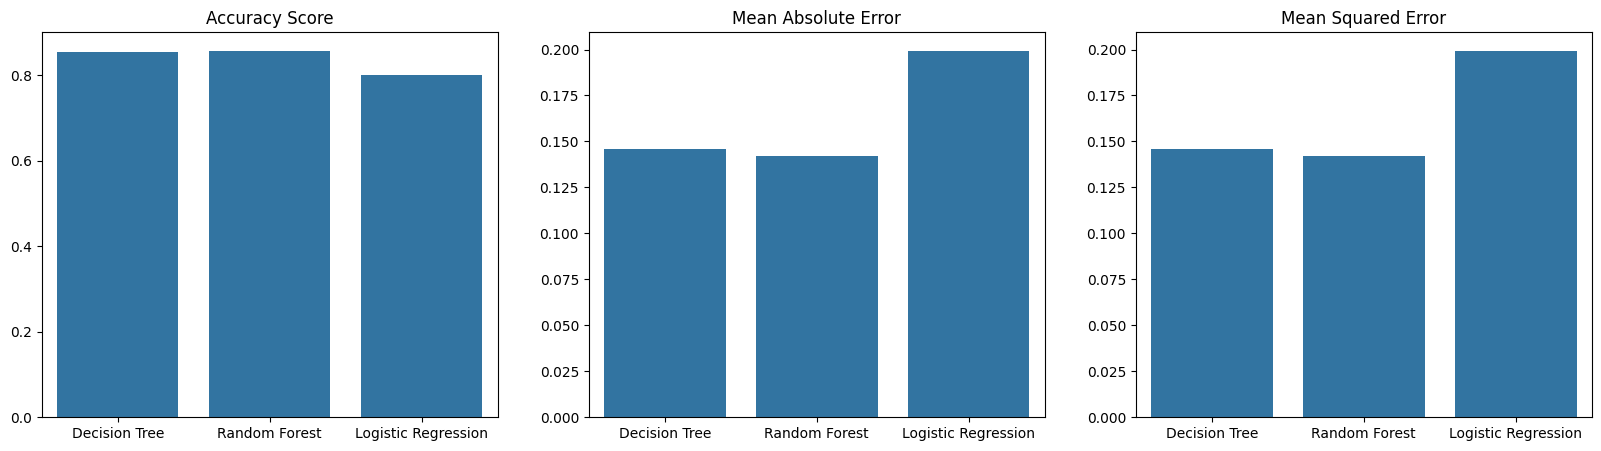

In [98]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
#Accuracy Score
sns.barplot(x=['Decision Tree','Random Forest', 'Logistic Regression'],y=[accuracy_score(y_test,d_pred),accuracy_score(y_test,r_pred),accuracy_score(y_test,l_pred)],ax=ax[0]).set_title('Accuracy Score')
#Mean Absolute Error
sns.barplot(x=['Decision Tree','Random Forest', 'Logistic Regression'],y=[mean_absolute_error(y_test,d_pred),mean_absolute_error(y_test,r_pred),mean_absolute_error(y_test,l_pred)],ax=ax[1]).set_title('Mean Absolute Error')
#Mean Squared Error
sns.barplot(x=['Decision Tree','Random Forest','Logistic Regression'],y=[mean_squared_error(y_test,d_pred),mean_squared_error(y_test,r_pred),mean_squared_error(y_test,l_pred)],ax=ax[2]).set_title('Mean Squared Error')

In [ ]:
#Feature Importance

Text(0.5, 1.0, 'Decision Tree')

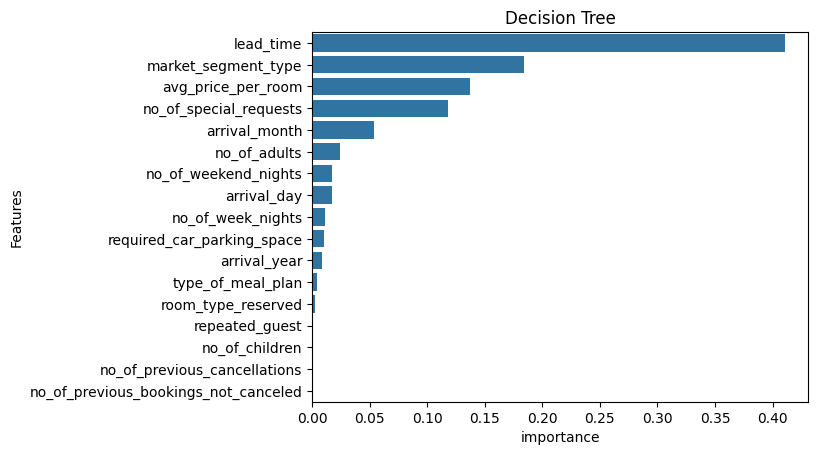

In [134]:
#decision tree
feature_importance=pd.DataFrame({'Features':X_train.columns,'importance':dtree.feature_importances_})
feature_importance.sort_values(by='importance',ascending=False,inplace=True)
feature_importance.reset_index(drop=True,inplace=True)
sns.barplot(x='importance',y='Features',data=feature_importance).set_title('Decision Tree')

Text(0.5, 1.0, 'Random Forest')

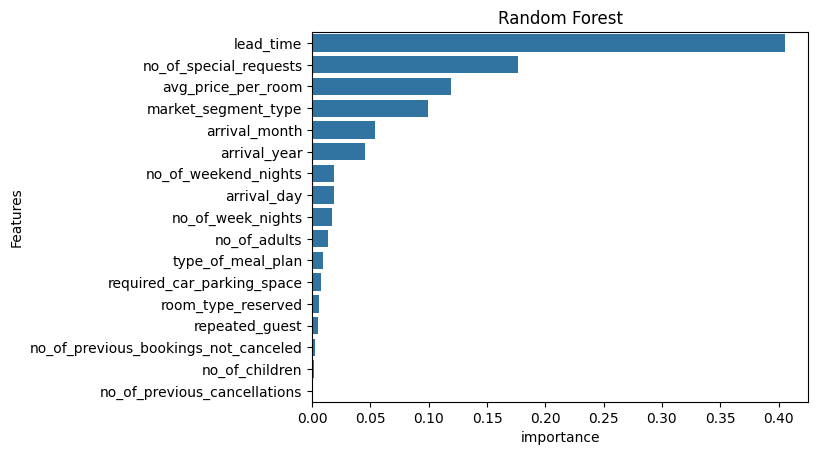

In [131]:
#Random Forest
feature_importance=pd.DataFrame({'Features':X_train.columns,'importance':rfc.feature_importances_})
feature_importance.sort_values(by='importance',ascending=False,inplace=True)
feature_importance.reset_index(drop=True,inplace=True)
sns.barplot(x='importance',y='Features',data=feature_importance).set_title('Random Forest')

In [1]:
#Conclusion

Conclusion
From the Exploratory Data Analysis, I came to know that, the most of the reservations wjere made for 2 adults with no children which could probably for a couple had highest cancellation count. In addtion to that, the cancellation count of reservations decreases when there are children involved. Most of the reservations were made for week nights and had exponentially higher cancellations as compared to those made for weekend nights.

The year 2018 had higher cancellation rate as compared to 2017, with most of the cancellation done in month of July and October. Upon visualization of the services opted during reservation with booking status, it was found that the services opted during reservation does not have any impact on the reservation cancellation.

The lead time had a huge impact on the reservation cancellation, which has been evident from feature importance as well. The guest who have lead time very less are less likely to cancel the reservation as compared to the guest who have more lead time. Therefore, with increased lead time, the guests have more time to think about the reservation and thus they are more likely to cancel the reservation. So, the hotel should try to take reservations for shorter lead time.

The market segment of the reservation also had an impact on the reservation cancellation. The reservations made through online platforms had the highest number of cancellations. This highlights the hotel's reputation and presence on online platforms. The hotel should try to improve its reputation on online platforms to reduce the reservation cancellation.

Coming to the classification models, I have used Decision Tree Classifier, Random Forest Classifier, Logistic Regression for predicting the reservation cancellation. The Decision Tree Classifier had the highest accuracy i.e. 85% among all the models.